LAB 3

In [1]:
#Consts
zBoson = 91.1880 #GeV/c^2
sigzBoson = .0020 #GeV/c^2
wBoson = 80.3692 #GeV/c^2
sigwBoson = .0133 #GeV/c^2
higgsBoson = 125.20 #GeV/c^2
sighiggsBoson = .11 #GeV/c^2
electron = 0.51099895000 #MeV/c^2
sigelectron = 0.00000000015 #MeV/c^2
muon = 105.6583755 #MeV/c^2
sigmuon = 0.0000023 #MeV/c^2
tau = 1776.93 #MeV/c^2
sigtau = 0.09 #MeV/c^2

In [2]:
#imports and data loading
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp
from scipy.optimize import curve_fit
from scipy import stats as st
import pandas as pd

pt1, pt2, eta1, eta2, phi1, phi2, E1, E2 = np.loadtxt("atlas_z_to_ll.csv", delimiter = ",", skiprows = 1, unpack = True)

In [3]:
#compute masses of the original particles
px1 = pt1*np.cos(phi1)
px2 = pt2*np.cos(phi2)

py1 = pt1*np.sin(phi1)
py2 = pt2*np.sin(phi2)

pz1 = pt1*np.sinh(eta1)
pz2 = pt2*np.sinh(eta2)

masses = np.sqrt((E1+E2)**2-((px1+px2)**2+(py1+py2)**2+(pz1+pz2)**2))
print(masses)

[92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693]


Text(0, 0.5, 'Counts')

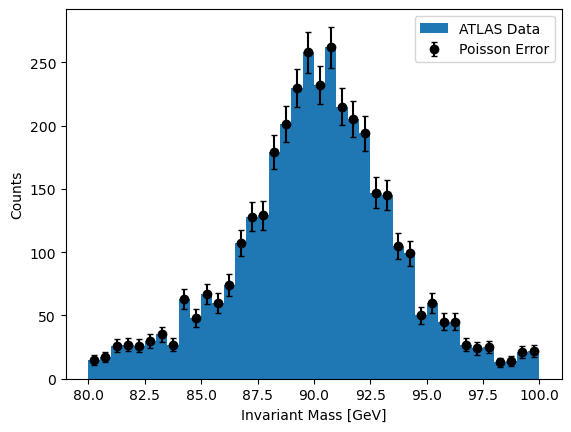

In [4]:
#histogram
bins = np.linspace(80, 100, 41) #binning range
fig, ax = plt.subplots()
counts, edges = np.histogram(masses, bins=bins)
ax.hist(masses, bins=bins, label = "ATLAS Data")
centers = .5*(edges[:-1]+edges[1:]) #have to make center of bins the average of the edges
yerr = np.sqrt(counts) #poisson error
ax.errorbar(centers, counts, yerr=yerr, fmt = "o", capsize = 2, color = "black", label ="Poisson Error") # plot errorbar on top
ax.legend()
ax.set_xlabel("Invariant Mass [GeV]")
ax.set_ylabel("Counts")
#edges.shape
#counts.shape

90.34080586021815 6.390998388763146
The χ² value is 10.0. This comparison has 10 degrees of freedom.
The p-value is 0.4
The best fit mass for Z boson is 90.3 ± 0.1 GeV
The best fit gamma is 6.4 ± 0.2


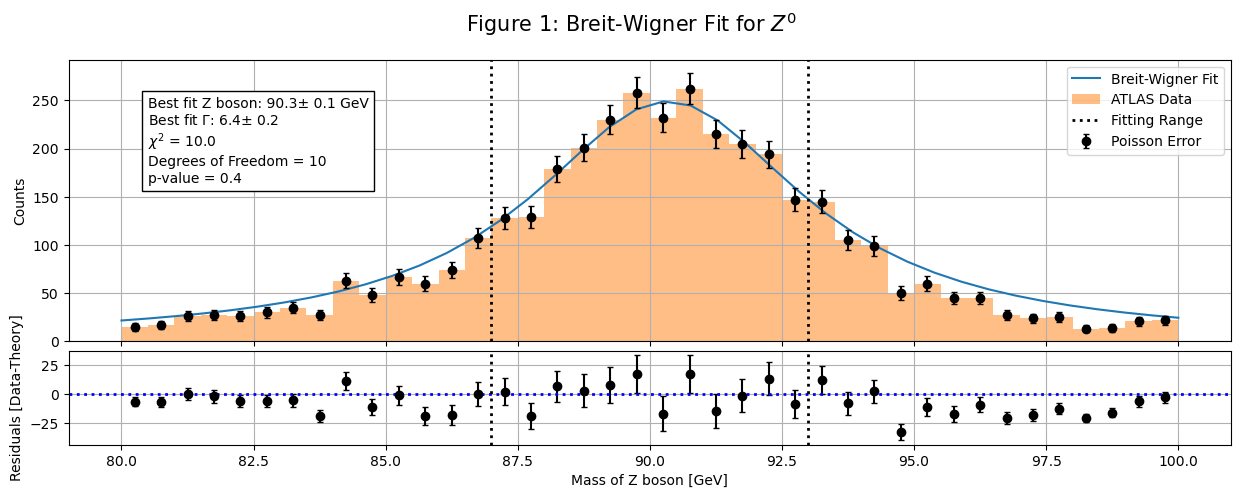

In [5]:
#Part 2 
#Step 1 establish the mask
mask = (centers > 87) & (centers < 93)
fit_x = centers[mask]
fit_y = counts[mask]
fit_err = yerr[mask]

#Step 2 defn of the function
def breitWigner(m,m0,gamma):
    A = 5000/2
    return A*(1/np.pi)*(.5*gamma)*(1/((m-m0)**2+(.5*gamma)**2))
params, covar = curve_fit(breitWigner, fit_x, fit_y, sigma = fit_err, absolute_sigma = True)
dummy_masses = np.linspace(80, 100, 40)

# step 3 initialize plots to do joint fitting and residual plots
fig1, (ax_top1, ax_bot1) = plt.subplots(
    2, 1, sharex = True, figsize = (15, 5), 
    gridspec_kw = {"height_ratios":[3,1], "hspace": .05})
print(params[0], params[1])
ytheory = breitWigner(dummy_masses, params[0], params[1])

#Plot everything
ax_top1.plot(dummy_masses, ytheory, label =  "Breit-Wigner Fit")
ax_top1.hist(masses, bins=bins, alpha = .5, label = "ATLAS Data")
centers = .5*(edges[:-1]+edges[1:])
yerr = np.sqrt(counts)
ax_top1.errorbar(centers, counts, yerr=yerr, fmt = "o", capsize = 2, color = "black", label = "Poisson Error")
ax_top1.grid()
residuals = counts-ytheory
ax_bot1.errorbar(centers, residuals, yerr = yerr, fmt = "o", capsize = 2, color = "black")
ax_bot1.grid()
ax_bot1.axhline(0, color = "blue", linestyle = "dotted", lw = 2, label = "Ideal Agreement")
ax_bot1.axvline(87, linestyle = "dotted", color = "black", lw = 2, label = "Fitting Range")
ax_bot1.axvline(93, linestyle = "dotted", color = "black", lw = 2)
ax_top1.axvline(87, linestyle = "dotted", color = "black", lw = 2, label = "Fitting Range")
ax_top1.axvline(93, linestyle = "dotted", color = "black", lw = 2)
ax_bot1.set_xlabel("Mass of Z boson [GeV]")
ax_top1.set_ylabel("Counts");
ax_bot1.set_ylabel("Residuals [Data-Theory]")
ax_top1.legend()

# calculate chisq
chisq = np.sum(((fit_y-breitWigner(fit_x, params[0], params[1]))/(fit_err))**2)
ndof = len(fit_x)-2
pvalue = st.chi2.sf(chisq, ndof)

#Print results
print("The \u03C7\u00B2 value is "+ f"{chisq:.1f}. This comparison has {ndof} degrees of freedom.") #can use unicode to print the nice chisq symbol
print(f"The p-value is {pvalue:.1f}" )
errs = np.sqrt(np.diag(covar))
print(f"The best fit mass for Z boson is {params[0]:.1f} \u00B1 {errs[0]:.1f} GeV")
print(f"The best fit gamma is {params[1]:.1f} \u00B1 {errs[1]:.1f}")
ax_top1.text(x = 80.5, y = 165, s = f"Best fit Z boson: {params[0]:.1f}\u00B1 {errs[0]:.1f} GeV\n"+r"Best fit $\Gamma$: "+f"{params[1]:.1f}\u00B1 {errs[1]:.1f}\n"+r"$\chi^2$ = " + f"{chisq:.1f} \nDegrees of Freedom = {ndof} \np-value = {pvalue:.1f}",fontsize=10, bbox=dict(facecolor='white') )
fig1.suptitle(r"Figure 1: Breit-Wigner Fit for $Z^0$", fontsize = 15);
fig1.savefig("Figure 1.png")

11.498778181311328 26.61078512383076


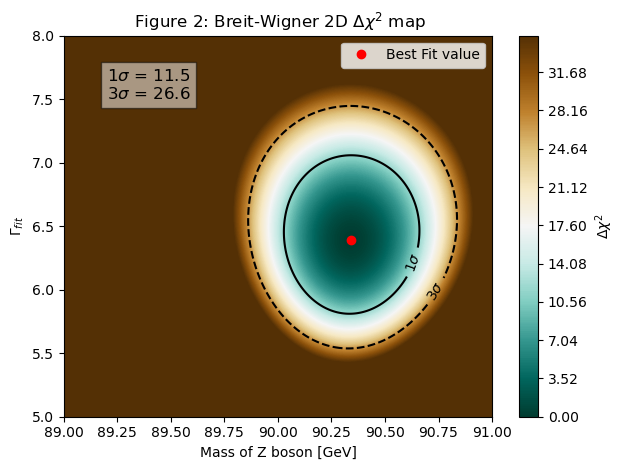

In [6]:
#Part 3
#initalize bins and ranges
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
m = np.linspace(89, 91, n_bins)
gamma = np.linspace(5, 8, n_bins)

# the double for loop to get chisq and visit every point for theory calculation
for i in range(n_bins):
    for j in range(n_bins):
        theory = breitWigner(fit_x, m[i], gamma[j])
        chi2 = np.sum((fit_y-theory)**2/(fit_err**2))
        chi_map[j,i] = chi2
#calc chi map
chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35) #clip to 35
delta_chi_map = chi_map - chi_min

#plot map/joint probability space
X,Y = np.meshgrid(m, gamma)
fig2, ax2 = plt.subplots(1,1)
cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap = "BrBG_r")
cbar = fig2.colorbar(cs, ax = ax2)
cbar.set_label(r"$\Delta \chi^2$")
#Confidence levels - we can use python to pull these out from the scipy.stats library
chi2_1sig = st.chi2.ppf(.68, ndof) #68 percent of data
chi2_3sig = st.chi2.ppf(.997, ndof) # 99.7 percent of data
print(chi2_1sig, chi2_3sig)
levels = [chi2_1sig, chi2_3sig]
CS = ax2.contour(X, Y, delta_chi_map, levels = levels, colors=["black", "black"], linestyles = ["solid", "dashed"])
ax2.plot(90.34, 6.39, "ro", label = "Best Fit value")
ax2.clabel(CS, fmt={chi2_1sig: r'1$\sigma$', chi2_3sig: r'3$\sigma$'})
ax2.set_xlabel(r"Mass of Z boson [GeV]")
ax2.set_ylabel(r"$\Gamma_{fit}$")
ax2.set_title(r" Figure 2: Breit-Wigner 2D $\Delta \chi^2$ map");
ax2.text(x = 89.2, y = 7.5, s = r"1$\sigma$ = "+ f"{chi2_1sig:.1f}\n" + r"3$\sigma$ = "+f"{chi2_3sig:.1f}",fontsize=12, bbox = dict(facecolor = "white", alpha = .5))
ax2.legend()
fig2.tight_layout()
fig2.savefig("Figure 2.png")

In [7]:
# Calculating percent error from lit value given in the consts section
percent_err = np.abs(((params[0]-zBoson)/zBoson)*100)
print(f"The percent error is {percent_err:.1f}%")
#Calculating how many sigma away from the literature value our value is 
ratio = np.abs((zBoson - params[0])/sigzBoson)
print(ratio)

The percent error is 0.9%
423.59706989092416
